<a href="https://colab.research.google.com/github/hellen2021/Football-Analysis-Mchezopesa-Limited/blob/main/Supervised_Learning_Regression_week1_IP_Core_Module2_15_04_2022_Hellen_Cheptoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis

### Football Analysis for Mchezopesa Limited Company

## 1.Defining the Research Questions

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

## 2.Defining the metric of success
This project will be a success if:

a) We are able to accurately predict the winning team based on the two conditions:
*   Home team or away team
*   Type of tournament

b) Achieve an accuracy of atleast 80%

c) have the lowest RMSE as possible

## 3.Understanding the context

## 4.Experimental Design
The following are the design steps:
*   Loading the datsets
*   Exploring and cleaning the datasets
*   Merge the two datasets
*   Perform EDA
*   Feature Engineering
*   Check for multicollinearity
*   Polynomial Regression
*   Logistic Regression
*   Compute the Root Mean Squared Error
*   Create residual plots for the models, and assess their heteroscedasticity using Bartlett’s test

## 4.Data Relevance
The relevance of the data will be verified by the performance of the model



## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,LabelEncoder
from sklearn.feature_extraction import DictVectorizer

from matplotlib.figure import Figure
import os
import warnings
import datetime

## Load the data

In [2]:
# Mounting Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Accessing the working directory
os.chdir('/content/drive/MyDrive/Moringa Data Science/CORE MODULE 2/week1IP')

In [4]:
# Loading dataset
results = pd.read_csv('results.csv')
fifa_ranking = pd.read_csv('fifa_ranking.csv')

## Datasets Preview

In [5]:
# results dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
# fifa ranking dataset
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


## Explore and clean the datasets

In [7]:
print('results dataset has',results.shape[0], 'rows and', results.shape[1], 'columns')
print('fifa ranking dataset has',fifa_ranking.shape[0], 'rows and', fifa_ranking.shape[1], 'columns')

results dataset has 40839 rows and 9 columns
fifa ranking dataset has 57793 rows and 16 columns


In [8]:
# shaping the column names
results.columns = results.columns.str.lower().str.strip().str.replace(' ', '_')
fifa_ranking.columns = fifa_ranking.columns.str.lower().str.strip().str.replace(' ', '_')

In [9]:
#renaming columns
fifa_ranking.rename(columns = {'country_full':'country'}, inplace = True)

In [10]:
# drop unnecessary columns
fifa_ranking.drop(columns = ['country_abrv', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
                  'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 'three_year_ago_weighted','confederation', 'rank_change'], axis = 1, inplace = True)
results.drop(columns = ['city', 'neutral'], axis = 1, inplace = True)

In [11]:
fifa_ranking.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'rank_date'], dtype='object')

In [12]:
# statistical analysis
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [13]:
# statistical analysis
fifa_ranking.describe()

,rank,total_points,previous_points
count,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926
std,58.618424,260.426863,302.872948
min,1.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000
50%,101.000000,0.000000,272.000000
75%,152.000000,92.790000,525.000000
max,209.000000,1775.030000,1920.000000


In [14]:
# info
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   country     40839 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.2+ MB


date column data type should be changed to date time

In [15]:
# info
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             57793 non-null  int64  
 1   country          57793 non-null  object 
 2   total_points     57793 non-null  float64
 3   previous_points  57793 non-null  int64  
 4   rank_date        57793 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.2+ MB


In [16]:
print(results['date'].unique())
print('****************************************************************')
print(fifa_ranking['rank_date'].unique())

['1872-11-30' '1873-03-08' '1874-03-07' ... '2019-07-18' '2019-07-19'
 '2019-07-20']
****************************************************************
['1993-08-08' '1993-09-23' '1993-10-22' '1993-11-19' '1993-12-23'
 '1994-02-15' '1994-03-15' '1994-04-19' '1994-05-17' '1994-06-14'
 '1994-07-21' '1994-09-13' '1994-10-25' '1994-11-22' '1994-12-20'
 '1995-02-20' '1995-04-19' '1995-05-16' '1995-06-13' '1995-07-25'
 '1995-08-22' '1995-09-19' '1995-10-17' '1995-11-21' '1995-12-19'
 '1996-01-24' '1996-02-21' '1996-04-24' '1996-05-22' '1996-07-03'
 '1996-08-28' '1996-09-25' '1996-10-23' '1996-11-20' '1996-12-18'
 '1997-02-27' '1997-04-09' '1997-05-14' '1997-06-18' '1997-07-16'
 '1997-08-20' '1997-09-17' '1997-10-17' '1997-11-19' '1997-12-23'
 '1998-02-18' '1998-03-18' '1998-04-22' '1998-05-20' '1998-07-15'
 '1998-08-19' '1998-09-16' '1998-10-21' '1998-11-18' '1998-12-23'
 '1999-01-27' '1999-02-24' '1999-03-24' '1999-04-21' '1999-05-19'
 '1999-06-16' '1999-07-21' '1999-08-18' '1999-09-15' '1999

rankings started from 1993, therefore we should drop columns before 1993 from the results datset

In [17]:
results.shape

(40839, 7)

In [18]:
# drop the records before 1993
results = results[results['date'] >= '1993']
results.shape


(23478, 7)

Now the rows have reduced from 40839 to 23478

In [19]:
# missing values
results.isnull().sum()

# no missing values

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
country       0
dtype: int64

In [20]:
# missing values
fifa_ranking.isnull().sum()

# there are no missing values

rank               0
country            0
total_points       0
previous_points    0
rank_date          0
dtype: int64

In [21]:
# duplicate values
value = results.duplicated().sum()
print(value)
print('results dataset has', value, 'duplicate values')
# results dataset has no duplicate values

1
results dataset has 1 duplicate values


In [22]:
# duplicate values
value = fifa_ranking.duplicated().sum()
print(value)
print('results dataset has', value, 'duplicate values')

37
results dataset has 37 duplicate values


In [23]:
# drop the duplicate values
fifa_ranking.drop_duplicates(keep='first', inplace = True)

In [24]:
# first, change the date columns to datetime
results['date'] = pd.to_datetime(results['date'])

# rename the rank_date column
fifa_ranking.rename(columns = {'rank_date':'date'}, inplace = True)
fifa_ranking['date'] = pd.to_datetime(fifa_ranking['date'])   

In [25]:
# split the date to months and year
# results
results['year'] = results.date.dt.year
results['month'] = results.date.dt.month

# fifa rankings
fifa_ranking['year'] = fifa_ranking.date.dt.year
fifa_ranking['month'] = fifa_ranking.date.dt.month


## Merging the two datasets to obtain Home_team ranking(home_team_rank)

In [26]:
# merge to obtain the home_team

home_football = pd.merge(results, fifa_ranking, how = 'inner', left_on = ['year', 'month', 'home_team'], right_on = ['year', 'month', 'country'])

In [27]:
# preview the new dataframe
pd.set_option('display.max_columns', None)
home_football.head()

,date_x,home_team,away_team,home_score,away_score,tournament,country_x,year,month,rank,country_y,total_points,previous_points,date_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,1993,8,19,Colombia,0.0,36,1993-08-08
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,1993,8,19,Colombia,0.0,36,1993-08-08
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Colombia,1993,8,19,Colombia,0.0,36,1993-08-08
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,1993,8,70,Peru,0.0,16,1993-08-08
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Peru,1993,8,70,Peru,0.0,16,1993-08-08


In [28]:
# drop nnecessary column
home_football.drop(columns = ['country_y', 'date_x', 'date_y'], axis = 1, inplace=True)

In [29]:
# rename some columns
home_football.rename(columns = {'country_x':'country', 'rank':'home_rank'}, inplace=True)

In [30]:
home_football.head(3)

,home_team,away_team,home_score,away_score,tournament,country,year,month,home_rank,total_points,previous_points
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,1993,8,19,0.0,36
1,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,1993,8,19,0.0,36
2,Colombia,Peru,4,0,FIFA World Cup qualification,Colombia,1993,8,19,0.0,36


note that the home team is similar to country column

## Merging the two datasets to obtain an away team ranking(away_team_rank)

In [31]:
# merge to obtain the home_team

away_football = pd.merge(results, fifa_ranking, how = 'inner', left_on = ['year', 'month', 'away_team'], right_on = ['year', 'month', 'country'])
away_football.head()

,date_x,home_team,away_team,home_score,away_score,tournament,country_x,year,month,rank,country_y,total_points,previous_points,date_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,1993,8,67,Paraguay,0.0,22,1993-08-08
1,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,1993,8,67,Paraguay,0.0,22,1993-08-08
2,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,1993,8,5,Argentina,0.0,51,1993-08-08
3,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,1993,8,5,Argentina,0.0,51,1993-08-08
4,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,1993,8,5,Argentina,0.0,51,1993-08-08


In [32]:
# drop nnecessary column
away_football.drop(columns = ['country_y', 'date_x', 'date_y'], axis = 1, inplace=True)

In [33]:
# rename some columns
away_football.rename(columns = {'country_x':'country', 'rank':'away_rank'}, inplace=True)

In [34]:
away_football = away_football[['away_rank','away_team', 'month', 'year']]
away_football.head()

,away_rank,away_team,month,year
0,67,Paraguay,8,1993
1,67,Paraguay,8,1993
2,5,Argentina,8,1993
3,5,Argentina,8,1993
4,5,Argentina,8,1993


## Merge the datasets to obtain home team rankings and away team rankings

In [35]:
# merge 
football = pd.merge(home_football, away_football, how = 'inner', left_on = ['year','month','away_team'], right_on = ['year','month','away_team'])
football.sample(10)

,home_team,away_team,home_score,away_score,tournament,country,year,month,home_rank,total_points,previous_points,away_rank
25850,Slovakia,Georgia,3,1,Friendly,Austria,2016,5,32,784.25,784,123
5438,Mexico,Paraguay,0,1,Friendly,United States,1999,10,11,0.00,709,18
27424,Singapore,Hong Kong,1,1,Friendly,Singapore,2017,8,171,116.03,118,146
25293,Kazakhstan,Netherlands,1,2,UEFA Euro qualification,Kazakhstan,2015,10,142,199.03,184,14
8901,American Samoa,Tonga,2,7,Oceania Nations Cup qualification,Samoa,2002,3,200,0.00,16,170
26046,Ukraine,Poland,0,1,UEFA Euro,France,2016,6,19,894.19,880,27
296,Italy,France,0,1,Friendly,Italy,1994,2,7,0.00,59,14
22311,South Africa,Central African Republic,2,0,FIFA World Cup qualification,South Africa,2013,3,60,530.53,525,52
23224,South Sudan,Ethiopia,0,2,CECAFA Cup,Kenya,2013,12,201,9.89,10,93
4852,India,Maldives,2,1,SAFF Cup,India,1999,4,115,0.00,293,167


## Exploratory Data Analysis

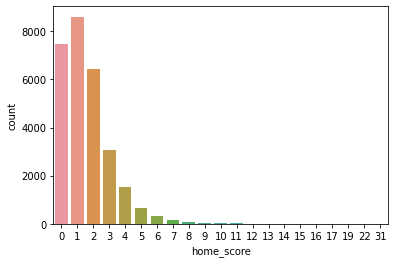

In [36]:
Figure(figsize=(10,8))
sns.countplot(x = 'home_score', data= football)
plt.show()

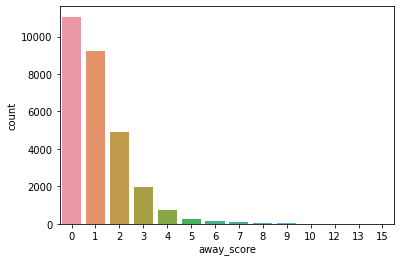

In [37]:
sns.countplot(x = 'away_score', data= football)
plt.show()

### Feature Engineering

In [38]:
# tournament
football['tournament'].nunique()

65

There are 65 tournaments, but we want to group them to 3, namely: Fifa worldcup, friendly and other

In [39]:
# grouping the tournament
def tournament(tournament):
  if tournament == 'FIFA World Cup qualification':
    return 'FIFA World Cup'
  elif tournament == 'Friendly':
    return 'Friendly'
  else:
    return 'Other'

# apply
football['tournament_type'] = football['tournament'].apply(lambda t: tournament(t))

In [40]:
football['tournament'].nunique()

65

In [41]:
# drop the original tournament column
football.drop(columns = ['tournament'], axis = 1, inplace = True)

We now have three types of tournaments

In [42]:
# goal difference column
football['goal_difference'] = football['home_score'] - football['away_score']
football.sample(5)

,home_team,away_team,home_score,away_score,country,year,month,home_rank,total_points,previous_points,away_rank,tournament_type,goal_difference
6131,Ethiopia,Burkina Faso,2,1,Ethiopia,2000,4,148,0.00,189,80,FIFA World Cup,1
27256,Malaysia,Lebanon,1,2,Malaysia,2017,6,155,147.86,145,135,Other,-1
9622,Lebanon,Bahrain,0,0,Kuwait,2002,12,119,0.00,386,105,Other,0
23809,Denmark,Armenia,2,1,Denmark,2014,9,27,832.79,818,52,Other,1
22187,Malaysia,Palestine,0,2,Malaysia,2013,3,164,128.73,130,150,Friendly,-2


In [43]:
# column that determines if the match ended with a win, draw or lose
def home_team(scores):
  if scores == 0:
    return 'Draw'
  elif scores > 0:
    return 'Win'
  else:
    return 'Lose'

football['match_outcome'] = football['goal_difference'].apply(lambda d: home_team(d))

In [44]:
football.sample(3)

,home_team,away_team,home_score,away_score,country,year,month,home_rank,total_points,previous_points,away_rank,tournament_type,goal_difference,match_outcome
12567,Algeria,Rwanda,1,0,Algeria,2005,3,75,0.0,535,100,FIFA World Cup,1,Win
15808,Belize,El Salvador,0,1,Belize,2008,1,201,0.0,0,135,Friendly,-1,Lose
9540,Sudan,Palestine,2,2,Kuwait,2002,12,106,0.0,401,151,Other,0,Draw


## Multicollinearity

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

This means that an independent variable can be predicted from another independent variable in a regression model.

Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable. 

## Detecting multicollinearity using pearsonn's correlation

In [45]:
# pearsonn's square to draw collinearity between variables
correlations = football.corr()
correlations

,home_score,away_score,year,month,home_rank,total_points,previous_points,away_rank,goal_difference
home_score,1.000000,-0.161033,-0.052214,0.020218,-0.114510,0.012154,0.069234,0.307728,0.824708
away_score,-0.161033,1.000000,-0.012372,0.019419,0.221365,-0.061949,-0.130760,-0.151487,-0.690983
year,-0.052214,-0.012372,1.000000,-0.008268,0.091889,0.624147,0.408979,0.091281,-0.031154
month,0.020218,0.019419,-0.008268,1.000000,0.067434,0.011014,-0.068743,0.068120,0.003681
home_rank,-0.114510,0.221365,0.091889,0.067434,1.000000,-0.299439,-0.652942,0.515308,-0.210721
total_points,0.012154,-0.061949,0.624147,0.011014,-0.299439,1.000000,0.546987,-0.147924,0.044401
previous_points,0.069234,-0.130760,0.408979,-0.068743,-0.652942,0.546987,1.000000,-0.310923,0.125640
away_rank,0.307728,-0.151487,0.091281,0.068120,0.515308,-0.147924,-0.310923,1.000000,0.312198
goal_difference,0.824708,-0.690983,-0.031154,0.003681,-0.210721,0.044401,0.125640,0.312198,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


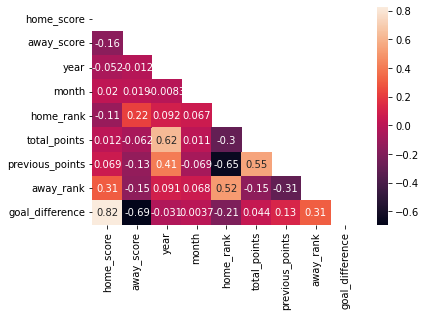

In [46]:
# visualize the correlations
Figure(figsize = (12, 10))

mask = np.zeros_like(football.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(football.corr(), annot =True, mask = mask)
plt.show()

## Detecting multicollinearity using Variance Inflation Factor(VIF) score
VIF score of an independent variable represents how well the variable is explained by other independent variables

*  VIF = 1, no correlation between the independent variable and the other variables
*  VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

## Fixing multicollinearity
Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features:




In [47]:
# vif
vif_df = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns = correlations.columns)
vif_df

,home_score,away_score,year,month,home_rank,total_points,previous_points,away_rank,goal_difference
home_score,-4.646106e+13,3.635009e+13,0.059194,-0.002003,0.295168,-0.004037,-0.133113,-0.704965,6.343410e+13
away_score,3.635009e+13,-2.843948e+13,0.140343,-0.027672,-0.462250,-0.060058,-0.026658,0.480574,-4.962941e+13
year,5.991796e-02,1.397771e-01,2.424536,0.045670,-1.329363,-1.271809,-1.196323,-0.124215,8.796539e-02
month,-1.958531e-03,-2.770693e-02,0.045670,1.011910,-0.027877,-0.092549,0.065602,-0.051307,-1.382091e-02
home_rank,2.947634e-01,-4.619334e-01,-1.329363,-0.027877,3.304436,0.547221,1.955056,-1.103669,1.673526e-01
total_points,-5.135398e-03,-5.919838e-02,-1.271809,-0.092549,0.547221,2.111535,-0.261046,0.078607,-4.613817e-02
previous_points,-1.331129e-01,-2.665775e-02,-1.196323,0.065602,1.955056,-0.261046,2.888071,-0.046768,1.291545e-01
away_rank,-7.049645e-01,4.805740e-01,-0.124215,-0.051307,-1.103669,0.078607,-0.046768,1.837295,1.059978e-01
goal_difference,6.343410e+13,-4.962941e+13,0.088954,-0.013760,0.166801,-0.047638,0.129155,0.105998,-8.660769e+13


In [48]:
# save the df to csv
football_df = football[['home_team', 'away_team', 'home_score', 'away_score', 'tournament_type', 'home_rank', 'away_rank', 'match_outcome']]

football_df.to_csv('final_fifa_rankings.csv')

In [49]:
# read the new dataset
football_df = pd.read_csv('final_fifa_rankings.csv')
football_df.head()

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament_type,home_rank,away_rank,match_outcome
0,0,Colombia,Paraguay,0,0,FIFA World Cup,19,67,Draw
1,1,Colombia,Paraguay,0,0,FIFA World Cup,19,67,Draw
2,2,Argentina,Paraguay,0,0,FIFA World Cup,5,67,Draw
3,3,Argentina,Paraguay,0,0,FIFA World Cup,5,67,Draw
4,4,Colombia,Argentina,2,1,FIFA World Cup,19,5,Win


In [50]:
# drop unnamed column
football_df.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [51]:
# bottom of dataset
football_df.tail()

,home_team,away_team,home_score,away_score,tournament_type,home_rank,away_rank,match_outcome
28434,Japan,Poland,0,1,Other,61,8,Lose
28435,Argentina,Iceland,1,1,Other,5,22,Draw
28436,Argentina,Iceland,1,1,Other,5,22,Draw
28437,Nigeria,Iceland,2,0,Other,48,22,Win
28438,Nigeria,Iceland,2,0,Other,48,22,Win


In [52]:
football_df.describe()

,home_score,away_score,home_rank,away_rank
count,28439.000000,28439.000000,28439.000000,28439.000000
mean,1.596821,1.101445,78.387813,81.409192
std,1.635258,1.279389,51.097232,52.575171
min,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,35.000000,38.000000
50%,1.000000,1.000000,73.000000,76.000000
75%,2.000000,2.000000,114.000000,119.000000
max,31.000000,15.000000,209.000000,209.000000


## Modelling

### Approach 1:Polynomial Regression

### Model 1: Predicting home score using polynomial regression

In [53]:
# separate the predictors from the target variable
predictor = football_df[['tournament_type', 'home_rank', 'away_rank']]
target = football_df['home_score'].values.reshape(-1,1)

# predictor = football_df.iloc[:,[4, 5, 6]].values
# target = football_df.iloc[:, 2].values

In [54]:
predictor.head()

,tournament_type,home_rank,away_rank
0,FIFA World Cup,19,67
1,FIFA World Cup,19,67
2,FIFA World Cup,5,67
3,FIFA World Cup,5,67
4,FIFA World Cup,19,5


In [55]:
# Encoding the categorical variable using dictvectorizer
# turn df into dict
football_df_dict = predictor.to_dict(orient='records') # turn each row as key-value pairs


# instantiate a Dictvectorizer object for X
dv_football = DictVectorizer(sparse=False) 
# sparse = False makes the output is not a sparse matrix

# apply dv_football on football_df_dict
football_encoded = dv_football.fit_transform(football_df_dict)


In [56]:
# convert the encoded array into a dataframe
football_enc = pd.DataFrame(football_encoded)
football_enc.head()

,0,1,2,3,4
0,67.0,19.0,1.0,0.0,0.0
1,67.0,19.0,1.0,0.0,0.0
2,67.0,5.0,1.0,0.0,0.0
3,67.0,5.0,1.0,0.0,0.0
4,5.0,19.0,1.0,0.0,0.0


In [57]:
# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(football_enc, target, test_size = 0.2, random_state=12)

If you don't specify the random_state in your code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.

However, if a fixed value is assigned like random_state = 12 then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.

In [58]:
# standardising the x_train and x_test to the same scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
# Fit polynomial Regression to the dataset
poly_features = PolynomialFeatures(degree = 4) 
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)


In [60]:
# Training the model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

making predictions

In [61]:
# Predict using Polynomial Regression
# We can also get the predictions as an array
y_pred = regressor.predict(X_test)


## Evaluate the performance of the model

In [62]:
# Measuring the accuracy of the model

print("The RMSE score for the model : ", np.sqrt(mean_squared_error(Y_test, y_pred)))

The RMSE score for the model :  1.3935208689818825
